# Methods of data preprocessing in machine learning
## Lab #2 Processing quantitative values

## Objective: To learn how to perform advanced preprocessing of data in sets containing quantitative attributes.

### Work plan.

Collect statistics on the dataset:
- Analyze the data types of each attribute.
- Determine which attributes have the correct initial data type and which ones need to be changed.
- Re-compile statistics if necessary.

Build a correlation matrix and its visualization:
- Determine which attributes are dependent on each other.
- Assess whether the correlation percentage is sufficient to combine them.

Analyze attributes for placeholders for empty values:
- Replace empty values ​​with correct ones.
- Re-compile statistics.

Analyze the number of empty values ​​as a percentage of the total number of records in the dataset:
- Determine whether there are insignificant attributes in the dataset.
- Remove such attributes.

Analyze attributes with a small number of missing data:
- Determine whether the missing data can be considered anomalies.
- Remove such lines if necessary.

Analyze the methods for filling the remaining attributes with empty values:
- Fill at least one attribute using the mixed pattern method.
- Explain how the groups were formed to fill the gaps.
- Fill the remaining attributes using the average value method.

Identify the shortcomings of the methods used:
- Analyze the potential shortcomings of the gap filling methods.

Build the correlation matrix again:
- Determine what changed after filling the gaps.
- Assess whether any previously non-existent dependencies were introduced into the data set.

Normalize the attributes:
- Try using all three types of normalization for one attribute.
- Provide the type of values ​​obtained.
- Compare the ranges of the obtained values.

Generate a report with screenshots and necessary explanations:
- Include screenshots of all stages of the work in the report.
- Add explanations for each step.

### Описание датасета.

Для выполнения лабораторной работы используется база данных по заболеваниям диабетом среди индейцев Пума, которая содержит 8 атрибутов, имеющих следующее описание:

* Pregnancies: количество беременностей;
* Glucose: концентрация глюкозы в плазме в течение 2 часов при оральном тесте на толерантность к глюкозе;
* BloodPressure: диастолическое артериальное давление (мм рт. ст.);
* SkinThickness: толщина кожной складки трицепса (мм);
* Insulin: 2-часовой сывороточный инсулин (мкЕд/мл);
* BMI: индекс массы тела (вес в кг / (рост в м) ^ 2);
* DiabetesPedigreeFunction: оценка вероятности развития диабета на основе семейного анамнеза;
* Age: возраст (годы);
* Outcome: переменная класса, 1 – наличие диабета, 0 - отсутствие.


## Progress of work.

## 1. Collect statistics on the data set. Analyze which attributes have the correct initial data type, and which ones need to be changed. Re-compile statistics if necessary.

To load and initially process the data, you need to import the Pandas, NumPy, Matplotlib libraries. The file with the original data is in the folder with the notebook ('NU_LR_2(diabetes_puma).csv'), and the description of the attributes is presented above. In the original data, the separator is ","; we will indicate this when loading. Values ​​without data will be marked as "null".

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('/home/nikita/Рабочий стол/MTUCI/мл/labs1/Lab3/НУ_ЛР_3(диабет_пума).csv', sep=',', na_values='null',header=0)
#print (df[0:60:10])

In [10]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [12]:
df.shape

(768, 9)

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
pd.options.display.max_columns=100
pd.get_option("display.max_columns")

100

In [18]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Let's get general statistics for the dataset. In the first case - for quantitative attributes, where:
* count is the number of filled attribute values;
* mean is the average attribute value;
* std is the root mean square value of the attribute;
* min is the minimum attribute value.
* 25%, 75% are the lower and upper quantiles of the attribute;
* 50% is the median of the attribute;
* max is the maximum attribute value.

In [21]:
df_describe = df.describe().T
df_describe.head(10)

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

* Pregnancies: number of pregnancies; Numeric attribute, type Int

In [28]:
print(df.value_counts(['Pregnancies'], normalize = False, sort = True))
print("attribute data type - ", df['Pregnancies'].dtypes)

Pregnancies
1              135
0              111
2              103
3               75
4               68
5               57
6               50
7               45
8               38
9               28
10              24
11              11
13              10
12               9
14               2
15               1
17               1
Name: count, dtype: int64
attribute data type -  int64


* Glucose: plasma glucose concentration over 2 hours in an oral glucose tolerance test; Numeric attribute, type Int

In [31]:
print(df.value_counts(['Glucose'], normalize = False, sort = True))
print("attribute data type - ", df['Glucose'].dtypes)

Glucose
99         17
100        17
129        14
125        14
106        14
           ..
169         1
61          1
178         1
177         1
199         1
Name: count, Length: 136, dtype: int64
attribute data type -  int64


* BloodPressure: diastolic blood pressure (mmHg); Numeric attribute, type Int

In [36]:
print(df.value_counts(['BloodPressure'], normalize = False, sort = True))
print("attribute data type - ", df['BloodPressure'].dtypes)

BloodPressure
70               57
74               52
78               45
68               45
72               44
64               43
80               40
76               39
60               37
0                35
62               34
82               30
66               30
88               25
84               23
90               22
58               21
86               21
50               13
56               12
54               11
52               11
92                8
75                8
65                7
85                6
94                6
48                5
96                4
44                4
110               3
106               3
100               3
98                3
108               2
104               2
46                2
55                2
30                2
95                1
61                1
102               1
38                1
40                1
24                1
114               1
122               1
Name: count, dtype: int64
attribute data type 

* SkinThickness: triceps skinfold thickness (mm); Numeric attribute, type Int

In [39]:
print(df.value_counts(['SkinThickness'], normalize = False, sort = True))
print("attribute data type - ", df['SkinThickness'].dtypes)

SkinThickness
0                227
32                31
30                27
27                23
23                22
18                20
28                20
33                20
31                19
19                18
39                18
29                17
40                16
37                16
22                16
25                16
26                16
41                15
35                15
36                14
15                14
17                14
20                13
24                12
13                11
42                11
21                10
46                 8
34                 8
12                 7
38                 7
11                 6
45                 6
16                 6
14                 6
43                 6
44                 5
10                 5
47                 4
48                 4
49                 3
50                 3
54                 2
52                 2
8                  2
7                  2
51                 1

* Insulin: 2-hour serum insulin (μU/ml); Attribute is numeric, type is Int

In [41]:
print(df.value_counts(['Insulin'], normalize = False, sort = True))
print("attribute data type - ", df['Insulin'].dtypes)

Insulin
0          374
105         11
140          9
130          9
120          8
          ... 
193          1
191          1
188          1
184          1
846          1
Name: count, Length: 186, dtype: int64
attribute data type -  int64


* BMI: body mass index (weight in kg / (height in m) ^ 2); Numeric attribute, type Float

In [43]:
print(df.value_counts(['BMI'], normalize = False, sort = True))
print("attribute data type - ", df['BMI'].dtypes)

BMI 
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
31.1     1
39.7     1
39.6     1
31.3     1
67.1     1
Name: count, Length: 248, dtype: int64
attribute data type -  float64


* DiabetesPedigreeFunction: estimate the probability of developing diabetes based on family history; Attribute is numeric, type is Float

In [45]:
print(df.value_counts(['DiabetesPedigreeFunction'], normalize = False, sort = True))
print("attribute data type - ", df['DiabetesPedigreeFunction'].dtypes)

DiabetesPedigreeFunction
0.258                       6
0.254                       6
0.261                       5
0.238                       5
0.259                       5
                           ..
0.420                       1
0.419                       1
0.417                       1
0.416                       1
2.420                       1
Name: count, Length: 517, dtype: int64
attribute data type -  float64


* Age: age (years); Numeric attribute, type Int

In [47]:
print(df.value_counts(['Age'], normalize = False, sort = True))
print("attribute data type - ", df['Age'].dtypes)

Age
22     72
21     63
25     48
24     46
23     38
28     35
26     33
27     32
29     29
31     24
41     22
30     21
37     19
42     18
33     17
38     16
36     16
32     16
45     15
34     14
40     13
43     13
46     13
39     12
35     10
52      8
44      8
50      8
51      8
58      7
54      6
47      6
53      5
60      5
49      5
57      5
48      5
66      4
62      4
63      4
55      4
59      3
56      3
65      3
67      3
61      2
69      2
64      1
68      1
70      1
72      1
81      1
Name: count, dtype: int64
attribute data type -  int64


* Outcome: class variable, 1 – presence of diabetes, 0 – absence. Numeric attribute, type Int

In [49]:
print(df.value_counts(['Outcome'], normalize = False, sort = True))
print("attribute data type - ", df['Outcome'].dtypes)

Outcome
0          500
1          268
Name: count, dtype: int64
attribute data type -  int64


### Data loading output:

Data loaded, 768 datasets, 9 attributes, all quantitative, type specified correctly.
All attributes filled.

## 2. Build a correlation matrix and its visualization. Which attributes are dependent on each other? Is the correlation percentage sufficient to combine them?

Pairwise dependency of attributes can be determined without using clustering. To do this, you need to build a correlation matrix using the corr() method. The main diagonal of the matrix shows the correlation of the attribute with itself and is always equal to 1. Other intersections show the correlation of the attributes specified in the row and column of the table.

In [61]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

The value of the correlation coefficient reflects the strength of the relationship. When assessing the strength of the relationship of the correlation coefficients, the Chaddock scale is used:

* Value Interpretation
* from 0 to 0.3 very weak
* from 0.3 to 0.5 weak
* from 0.5 to 0.7 average
* from 0.7 to 0.9 high
* from 0.9 to 1 very high

In case of negative correlation, the values ​​of the strength of the relationship between the variables are changed to the opposite.

For example:

* if the value of the correlation coefficient between the variables is -0.36, then this is a weak negative correlation, and most likely we will not take it into account;
* if the value of the correlation coefficient is 0, therefore the variables are not related to each other;
* if the value of the correlation coefficient between the variables is 0.25, then this is a very weak correlation and in most cases we do not take it into account;
* if the value of the correlation coefficient between variables is 0.75, then this is a high correlation and we should pay attention to it in our interpretations;
* if the value of the correlation coefficient is 1, then they are completely interconnected.

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

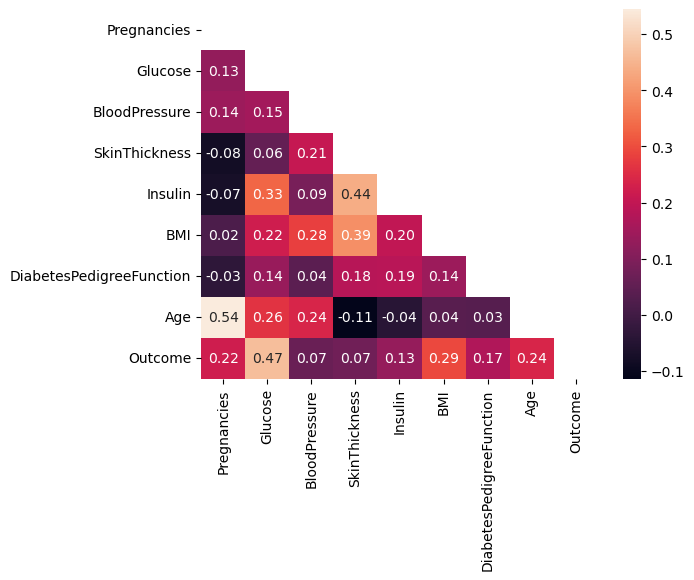

In [66]:
mask = np.triu(df.corr())
corr = sns.heatmap(df.corr(),
                 cbar=True,
                 annot=True,
                 mask=mask, fmt='.2f')

Another possible, but not the best way to build a corr. matrix. But with this method, "outliers" of values ​​of some attributes are immediately noticeable. (data clusters away from the main "cloud")

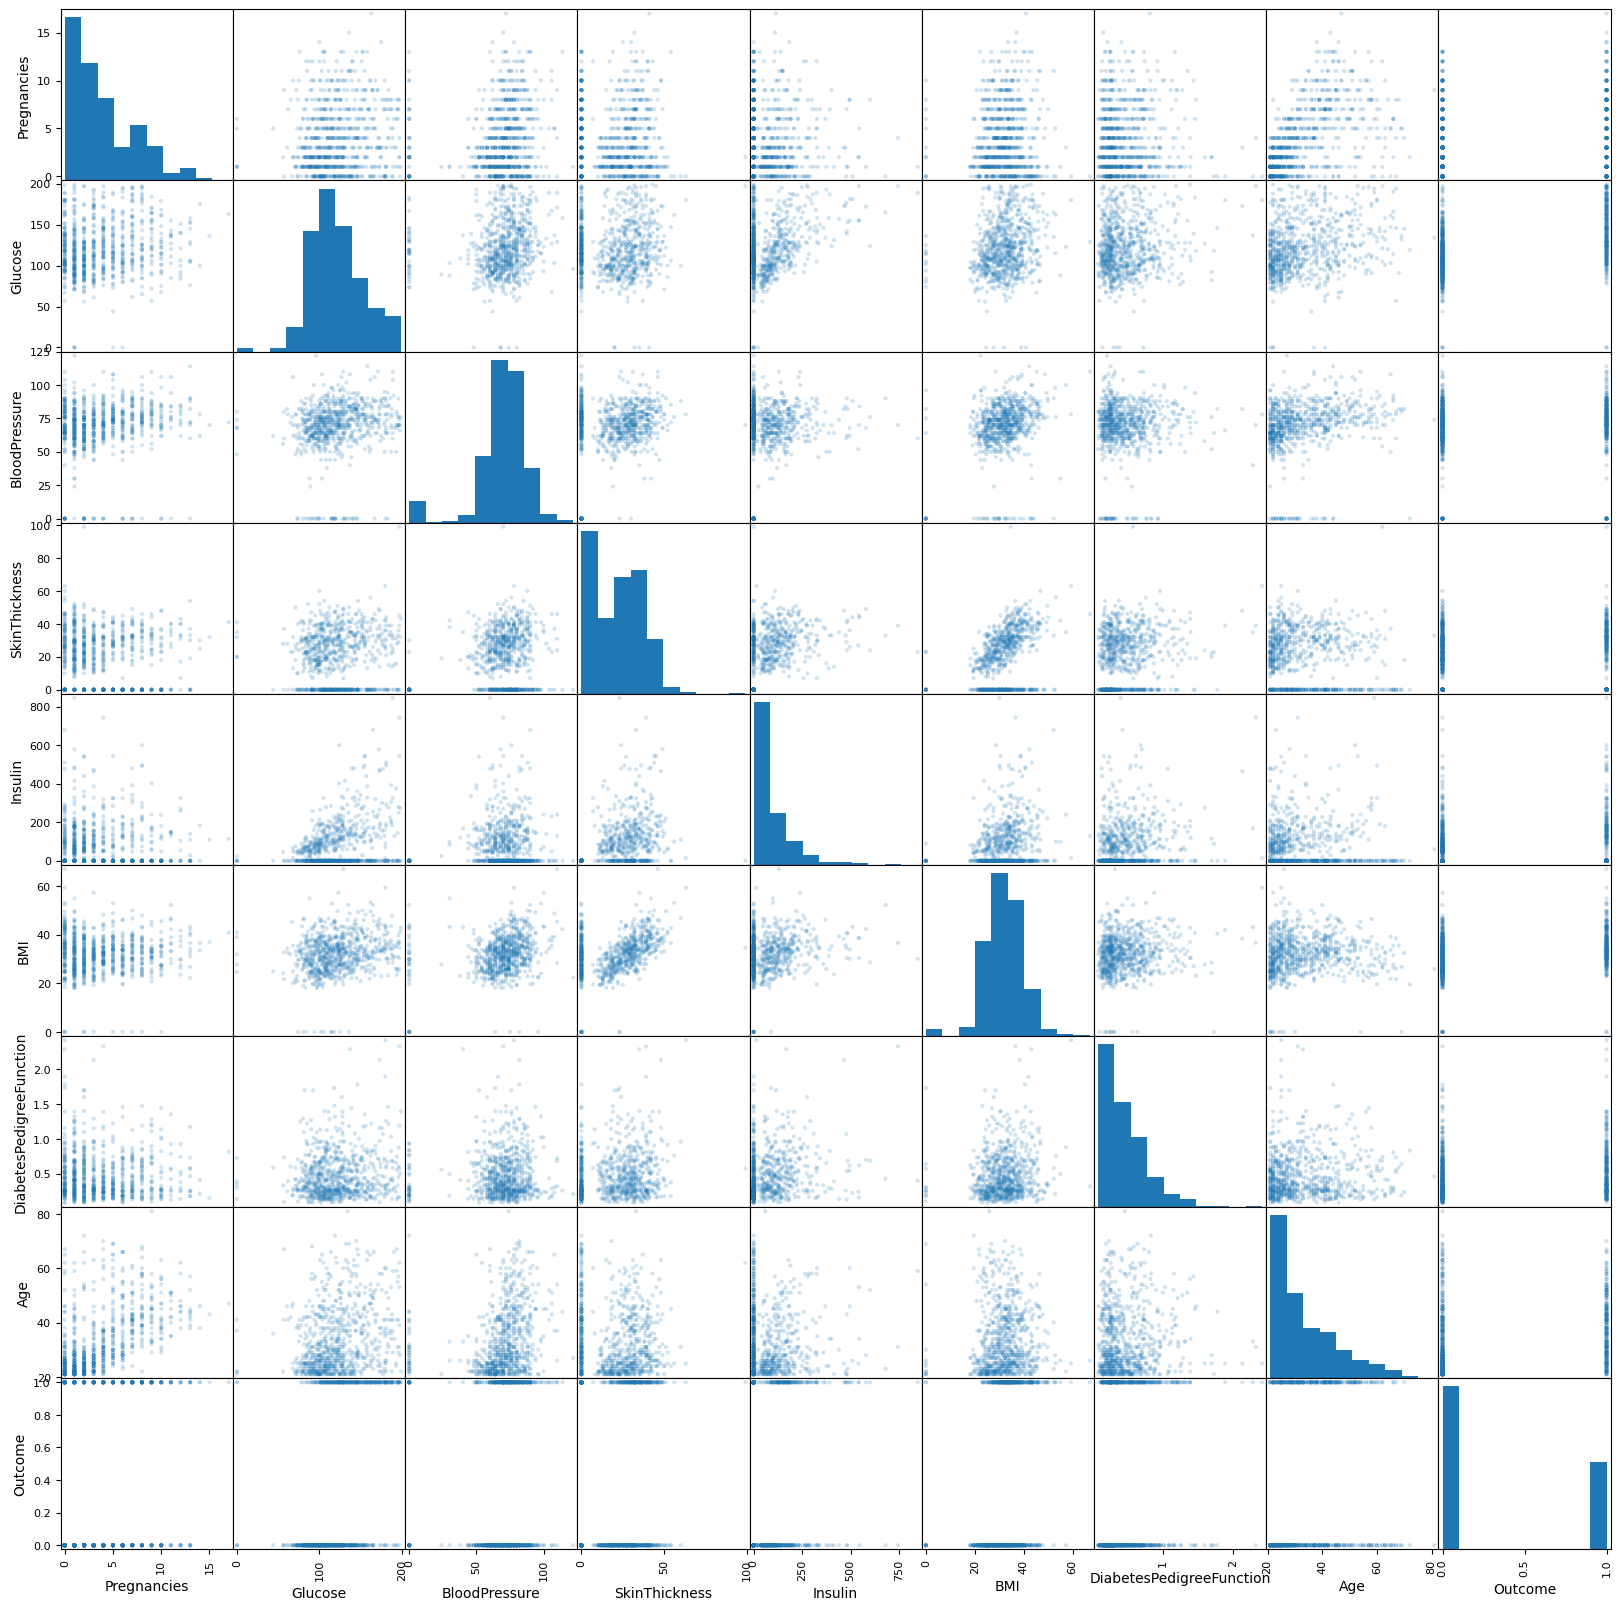

In [69]:
%matplotlib inline   
fig = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20, 20))
plt.show()

### Conclusion on the correlation matrix:

* The attributes age and number of pregnancies have an average positive correlation of strength.
* The attributes glucose concentration and diabetes, insulin, body mass index and triceps skinfold thickness, BMI and diabetes, BMI and DA pressure, insulin and glucose test, age and glucose, have a weak positive correlation of strength.
* The remaining attributes have a very weak correlation with each other.

We cannot say that it is necessary to combine the attributes.

## 3. Analyze attributes for placeholder values ​​for empty values. Such values ​​will be physically impossible for a number of attributes. Replace empty values ​​and recompile statistics.

In [73]:
df_describe.head(10)

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

Most attributes have a minimum value of "0". Let's list the attributes for which this value is impossible, since biological parameters such as glucose, blood pressure, skin thickness, insulin, and BMI cannot have zero values, it seems that zero values ​​were coded as zeros.

In [76]:
((df.Pregnancies == 0).sum(),
(df.Glucose==0).sum(),
(df.BloodPressure==0).sum(),
(df.SkinThickness==0).sum(),
(df.Insulin==0).sum(),
(df.BMI==0).sum(),
(df.DiabetesPedigreeFunction==0).sum(),
(df.Age==0).sum())


(111, 5, 35, 227, 374, 11, 0, 0)

Or in this way.

In [79]:
atr = df.columns
print(atr)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [71]:
for i in atr:
    print(i, '=', (df[i] == 0).sum())

Pregnancies = 111
Glucose = 5
BloodPressure = 35
SkinThickness = 227
Insulin = 374
BMI = 11
DiabetesPedigreeFunction = 0
Age = 0
Outcome = 500


For the attributes glucose, blood pressure, skin thickness, insulin and BMI, replace "0" with NaN

In [82]:

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [84]:
df_describe = df.describe().T
df_describe.head(10)

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   763.0  121.686763   30.535641  44.000  99.00000   
BloodPressure             733.0   72.405184   12.382158  24.000  64.00000   
SkinThickness             541.0   29.153420   10.476982   7.000  22.00000   
Insulin                   394.0  155.548223  118.775855  14.000  76.25000   
BMI                       757.0   32.457464    6.924988  18.200  27.50000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  141.00000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              29.0000   36.00000   99.00  
Insulin                   125.0000  190.00000  846.00  
BMI                        32.3000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

### Conclusion on the filling of attributes with placeholder values:
Attributes 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' had placeholder values ​​in the form of "0". Replaced this data with "missing" = "NaN".

## 4.Analyze the number of empty values ​​as a percentage of the total number of records in the data set. Are there any insignificant attributes in the data set? If so, remove such attributes.

In [88]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [90]:
import plotly.offline as py
import plotly.graph_objs as go

In [92]:
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig) 

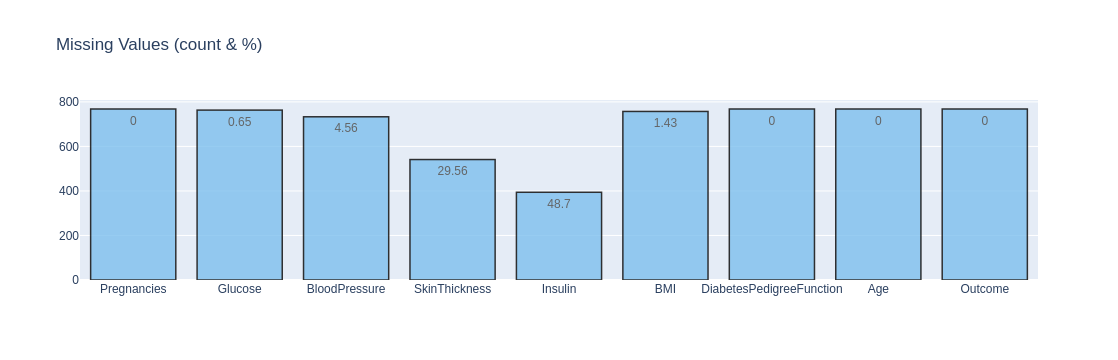

In [94]:
missing_plot(df, 'Outcome')

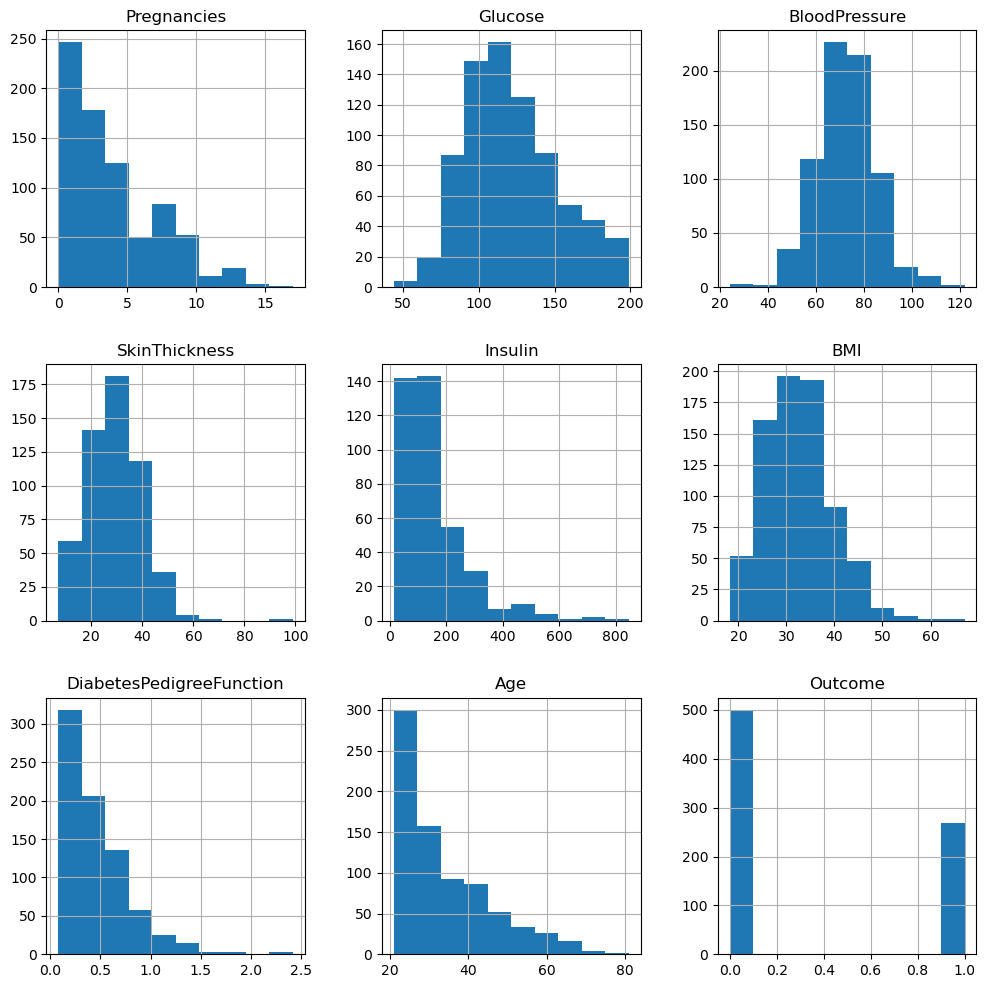

In [96]:
df.hist(figsize = (12, 12));

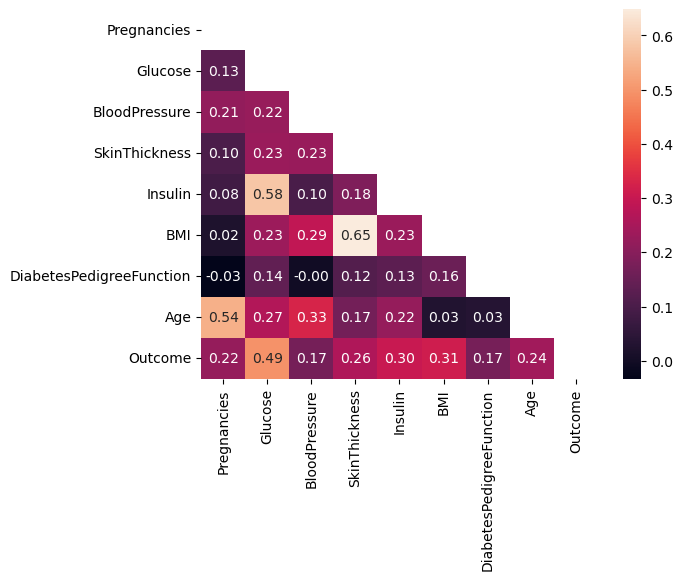

In [98]:
mask = np.triu(df.corr())
corr = sns.heatmap(df.corr(),
                 cbar=True,
                 annot=True,
                 mask=mask, fmt='.2f')

***The Insulin attribute has almost half of the gaps, and also has a moderate positive relationship with glucose, so we will remove it from the dataset.***

"..At this stage, the lowest relationship with the output parameter is DiabetesPedigreeFunction, and this parameter is meaningless without a full description of the dataset, since we do not know what the range from 0 to 2.5 means.
Therefore, we will remove the DiabetesPedigreeFunction attribute from the dataset."

In [101]:
df.drop('Insulin', inplace=True, axis=1)

In [103]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6    148.0           72.0           35.0  33.6   
1            1     85.0           66.0           29.0  26.6   
2            8    183.0           64.0            NaN  23.3   
3            1     89.0           66.0           23.0  28.1   
4            0    137.0           40.0           35.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [105]:
atr = df.columns
print(atr)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


### Attribute fullness output:
Missing values:

* Insulin = 48.7% - 374
* SkinThickness = 29.56% - 227
* BloodPressure = 4.56% - 35
* BMI = 1.43% - 11
* Glucose = 0.65% - 5

Insulin attribute removed

## 5. Are there any attributes in the dataset that have a small number of missing data? Can the missing data be considered anomalies in this case? If so, remove such rows.

The dataset contains attributes with minor gaps (BMI = 11, Glucose = 5), sets of examples with these values ​​can be removed from the dataset. No anomalies were found.

In [110]:
print ("Number of rows before removing duplicates = ", len(df))
df = df[(df.Glucose.notnull())] # & (df.BMI.notnull())]
df = df.drop_duplicates(keep = 'first')
print ("Number of rows after removing duplicates = ", len(df))

Number of rows before removing duplicates =  768
Number of rows after removing duplicates =  763


Removed only glucose (Glucose = 5)

In [113]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

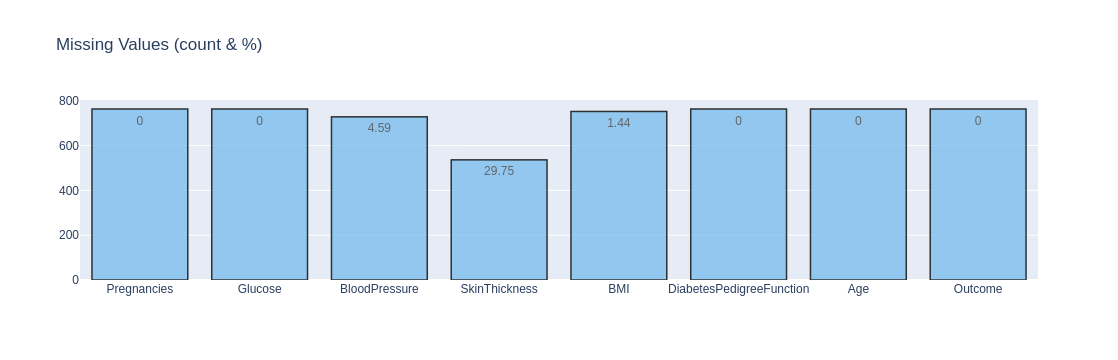

In [115]:
missing_plot(df, 'Outcome')

In [117]:
df_describe = df.describe().T
df_describe.head(10)

count        mean        std     min      25%  \
Pregnancies               763.0    3.851900   3.374729   0.000   1.0000   
Glucose                   763.0  121.686763  30.535641  44.000  99.0000   
BloodPressure             728.0   72.438187  12.386109  24.000  64.0000   
SkinThickness             536.0   29.149254  10.494686   7.000  22.0000   
BMI                       752.0   32.454654   6.928926  18.200  27.5000   
DiabetesPedigreeFunction  763.0    0.472477   0.331963   0.078   0.2435   
Age                       763.0   33.271298  11.772161  21.000  24.0000   
Outcome                   763.0    0.348624   0.476847   0.000   0.0000   

                              50%       75%     max  
Pregnancies                 3.000    6.0000   17.00  
Glucose                   117.000  141.0000  199.00  
BloodPressure              72.000   80.0000  122.00  
SkinThickness              29.000   36.0000   99.00  
BMI                        32.300   36.6000   67.10  
DiabetesPedigreeFunction    0.374    0.6265    2.42  
Age                        29.000   41.0000   81.00  
Outcome                     0.000    1.0000    1.00

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             728 non-null    float64
 3   SkinThickness             536 non-null    float64
 4   BMI                       752 non-null    float64
 5   DiabetesPedigreeFunction  763 non-null    float64
 6   Age                       763 non-null    int64  
 7   Outcome                   763 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 53.6 KB


### Conclusion on attribute fullness (2):
No anomalies or complete duplicates of data were found. Some examples were removed that did not have the Glucose attribute.

## 6. Analyze how to fill in the remaining attributes with empty values. Fill in at least one attribute using the mixed pattern method and explain how groups were formed to fill in the gaps. Fill in the remaining attributes using the average value method.

Of the attributes with missing values, the following remained:
* BloodPressure 28
* SkinThickness 218
* BMI 11

BMI, BloodPressure - few missing values, the parameter is physiological, can be filled with an average value.
SkinThickness - 30% missing values, must be filled using the attribute recovery method.

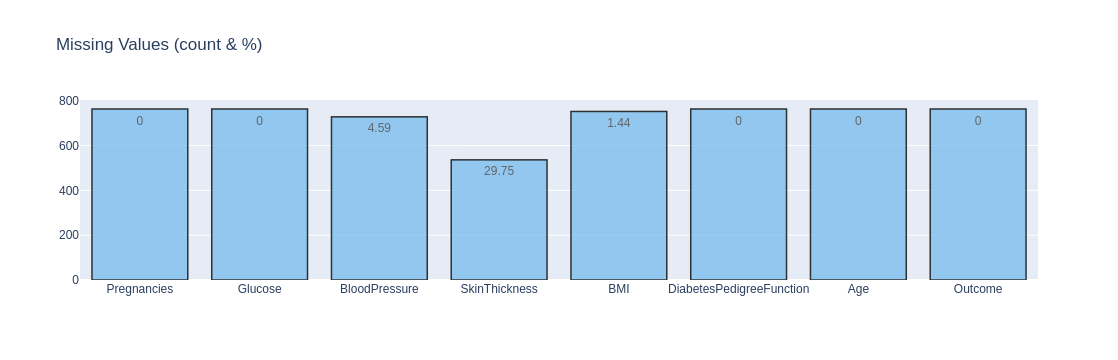

In [124]:
missing_plot(df, 'Outcome')

By the method of average

In [128]:
SR = df['BMI'].mean()
print(type(SR))
df['BMI'] = df['BMI'].replace(to_replace=np.nan, value=int(SR))

<class 'numpy.float64'>


Mixed Pattern Method

In [131]:
def median_target(var, data):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [133]:
tempBMI = median_target('SkinThickness', df)
tempBMI.head()

Outcome  SkinThickness
0        0           27.0
1        1           32.0

In [135]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = tempBMI.SkinThickness[0]
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = tempBMI.SkinThickness[1]

In [137]:
tempBloodPressure = median_target('BloodPressure', df)
tempBloodPressure.head()

Outcome  BloodPressure
0        0           70.0
1        1           74.5

In [139]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = tempBloodPressure.BloodPressure[0]
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = tempBloodPressure.BloodPressure[1]

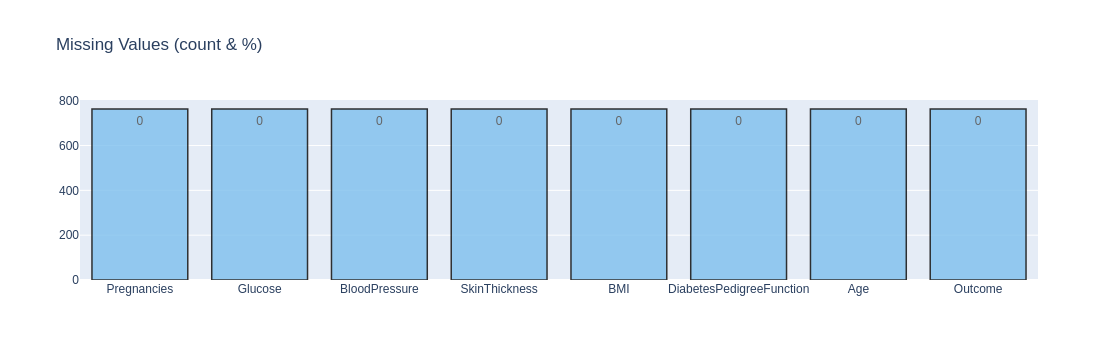

In [141]:
missing_plot(df, 'Outcome')

## 7. What are the disadvantages of the methods used?

We replace data with artificially selected ones, not real ones. There remains an error between the replaced value and the real one.

## 8. Run the correlation matrix again. What has changed? Has any previously non-existent dependency been introduced into the data set?

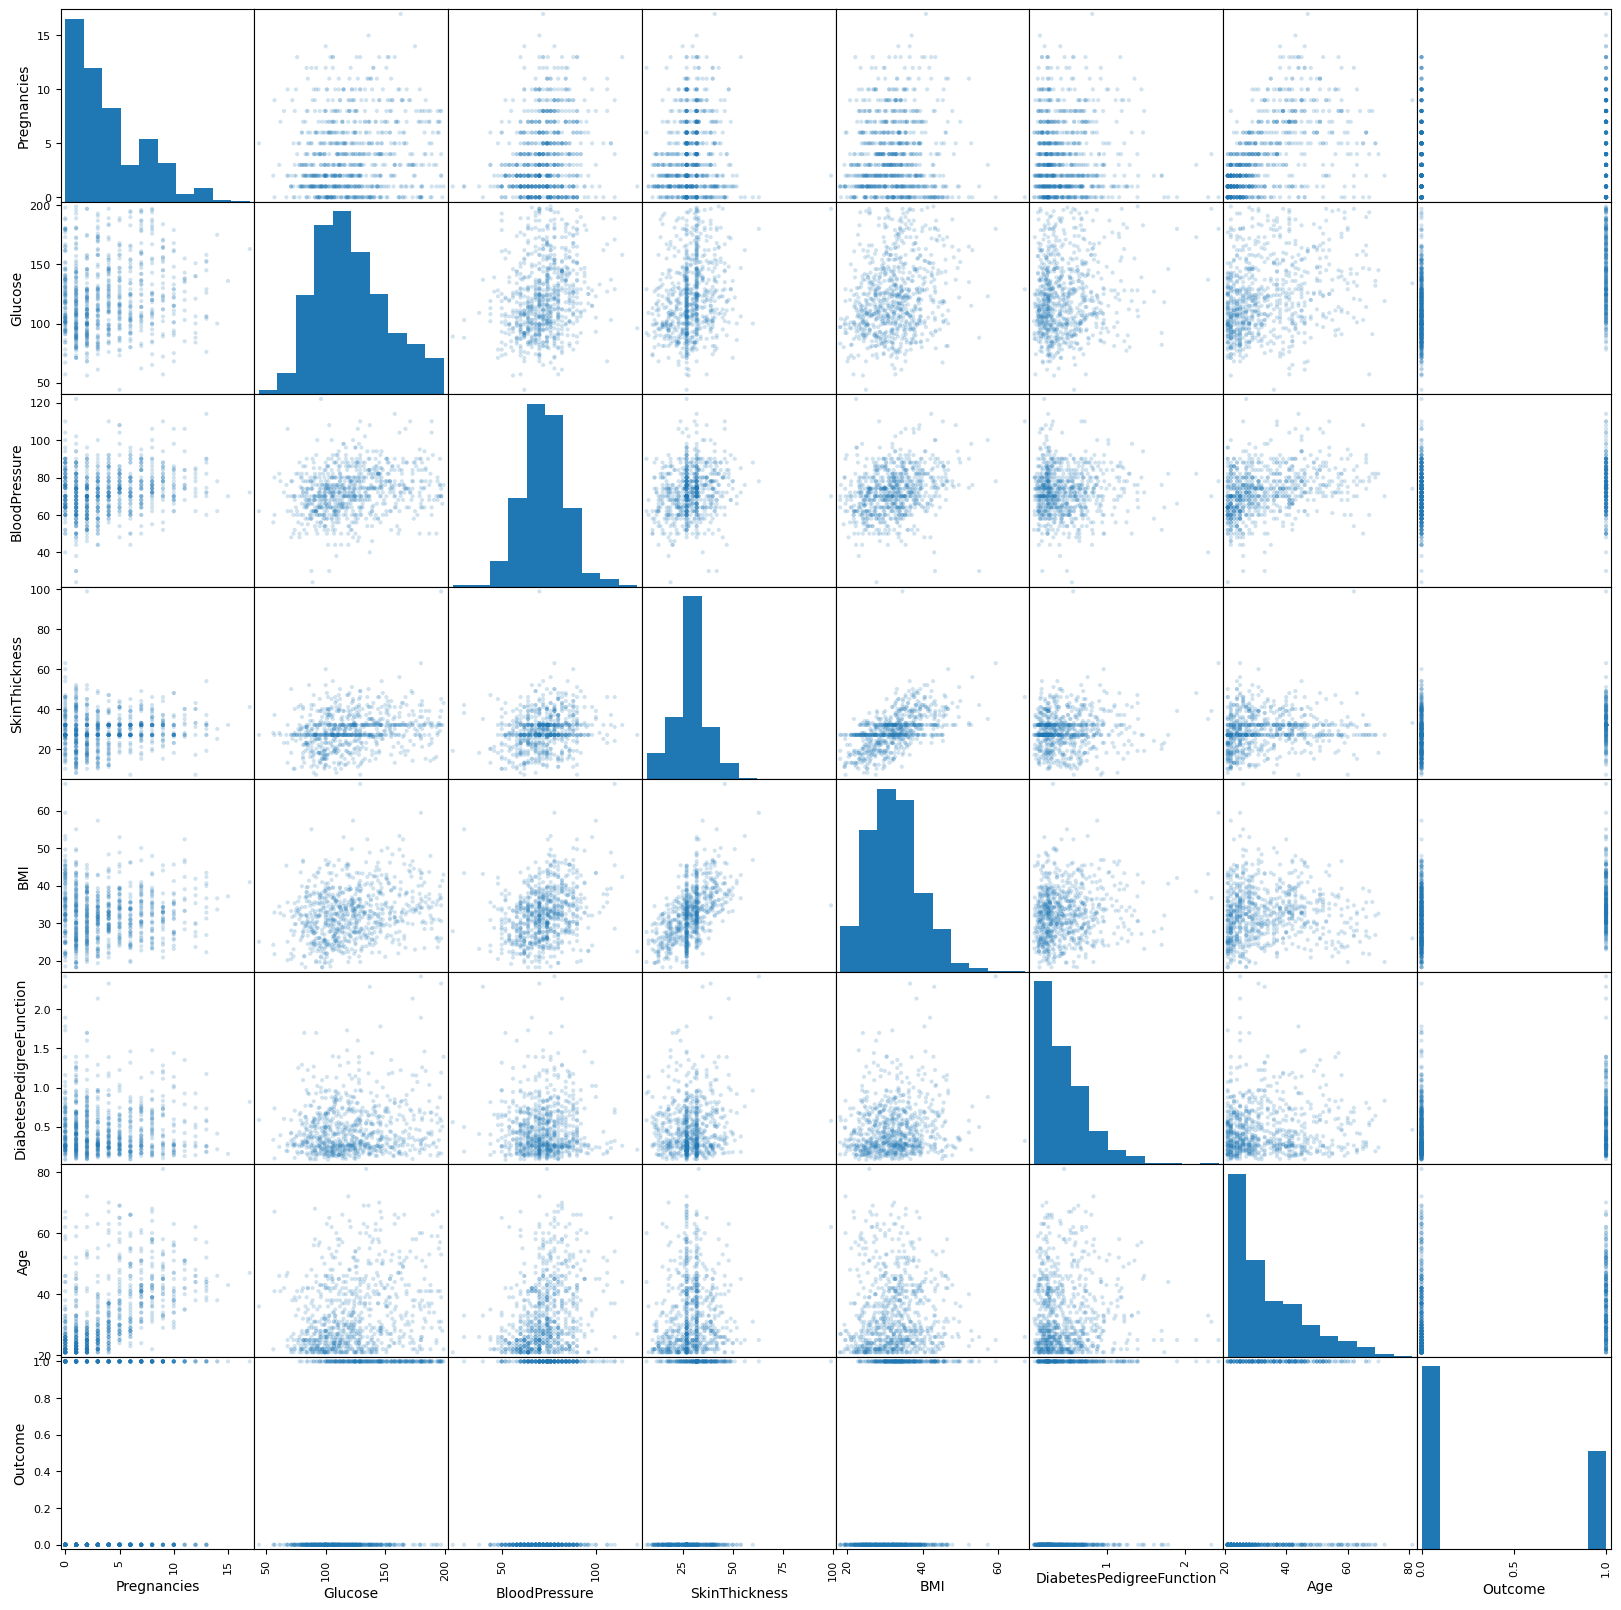

In [146]:
%matplotlib inline   
fig = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20, 20))
plt.show()

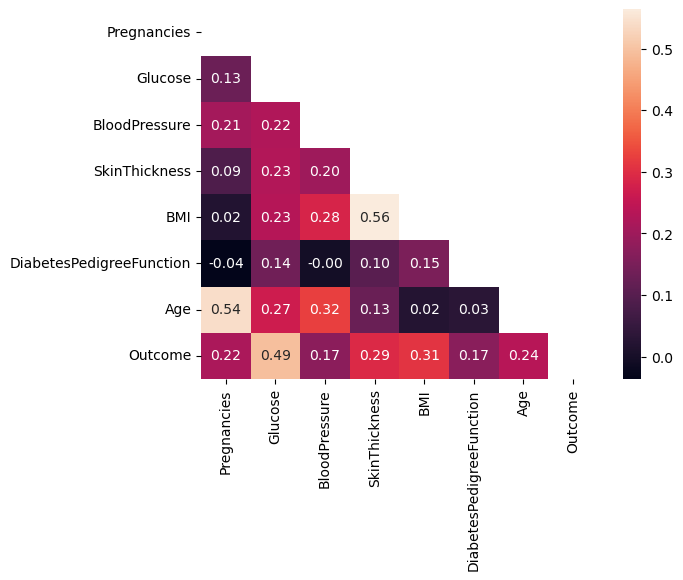

In [148]:
mask = np.triu(df.corr())
corr = sns.heatmap(df.corr(),
                 cbar=True,
                 annot=True,
                 mask=mask, fmt='.2f')

### Conclusion on the correlation matrix:

* The attributes age and number of pregnancies, body mass index and triceps skin fold thickness have an average positive correlation of strength.
* The attributes glucose concentration and diabetes, diabetes and body mass index, age and pressure have a weak positive correlation of strength.
* The remaining attributes have a very weak correlation with each other.

It makes sense to combine the attributes BMI and skin thickness.

## 9. Perform attribute normalization. Try using all three types of normalization for one attribute and show the type of values ​​obtained. Compare the ranges of the obtained values.

In [152]:
# using max
df_max_scaled = df.copy() 
  
for column in df_max_scaled.columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 
      
df_max_scaled_describe = df_max_scaled.describe().T
df_max_scaled_describe.head(10)

count      mean       std       min       25%  \
Pregnancies               763.0  0.226582  0.198513  0.000000  0.058824   
Glucose                   763.0  0.611491  0.153445  0.221106  0.497487   
BloodPressure             763.0  0.593612  0.099247  0.196721  0.524590   
SkinThickness             763.0  0.293803  0.089840  0.070707  0.252525   
BMI                       763.0  0.483578  0.102518  0.271237  0.409836   
DiabetesPedigreeFunction  763.0  0.195238  0.137175  0.032231  0.100620   
Age                       763.0  0.410757  0.145335  0.259259  0.296296   
Outcome                   763.0  0.348624  0.476847  0.000000  0.000000   

                               50%       75%  max  
Pregnancies               0.176471  0.352941  1.0  
Glucose                   0.587940  0.708543  1.0  
BloodPressure             0.590164  0.655738  1.0  
SkinThickness             0.282828  0.323232  1.0  
BMI                       0.476900  0.544709  1.0  
DiabetesPedigreeFunction  0.154545  0.258884  1.0  
Age                       0.358025  0.506173  1.0  
Outcome                   0.000000  1.000000  1.0

In [154]:
df_min_max_scaled = df.copy() 
  
for column in df_min_max_scaled.columns: 
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     

df_min_max_scaled_describe = df_min_max_scaled.describe().T
df_min_max_scaled_describe.head(10)

count      mean       std  min       25%       50%  \
Pregnancies               763.0  0.226582  0.198513  0.0  0.058824  0.176471   
Glucose                   763.0  0.501205  0.197004  0.0  0.354839  0.470968   
BloodPressure             763.0  0.494089  0.123552  0.0  0.408163  0.489796   
SkinThickness             763.0  0.240071  0.096675  0.0  0.195652  0.228261   
BMI                       763.0  0.291372  0.140674  0.0  0.190184  0.282209   
DiabetesPedigreeFunction  763.0  0.168436  0.141744  0.0  0.070666  0.126388   
Age                       763.0  0.204522  0.196203  0.0  0.050000  0.133333   
Outcome                   763.0  0.348624  0.476847  0.0  0.000000  0.000000   

                               75%  max  
Pregnancies               0.352941  1.0  
Glucose                   0.625806  1.0  
BloodPressure             0.571429  1.0  
SkinThickness             0.271739  1.0  
BMI                       0.375256  1.0  
DiabetesPedigreeFunction  0.234202  1.0  
Age                       0.333333  1.0  
Outcome                   1.000000  1.0

In [156]:
#Everything is the opposite from min-max
df_max_min_scaled = df.copy() 
  
for column in df_max_min_scaled.columns: 
    df_max_min_scaled[column] = (df_max_min_scaled[column] - df_max_min_scaled[column].max()) / (df_max_min_scaled[column].min() - df_max_min_scaled[column].max())     

df_max_min_scaled_describe = df_max_min_scaled.describe().T
df_max_min_scaled_describe.head(10)

count      mean       std  min       25%       50%  \
Pregnancies               763.0  0.773418  0.198513 -0.0  0.647059  0.823529   
Glucose                   763.0  0.498795  0.197004 -0.0  0.374194  0.529032   
BloodPressure             763.0  0.505911  0.123552 -0.0  0.428571  0.510204   
SkinThickness             763.0  0.759929  0.096675 -0.0  0.728261  0.771739   
BMI                       763.0  0.708628  0.140674 -0.0  0.624744  0.717791   
DiabetesPedigreeFunction  763.0  0.831564  0.141744 -0.0  0.765798  0.873612   
Age                       763.0  0.795478  0.196203 -0.0  0.666667  0.866667   
Outcome                   763.0  0.651376  0.476847 -0.0 -0.000000  1.000000   

                               75%  max  
Pregnancies               0.941176  1.0  
Glucose                   0.645161  1.0  
BloodPressure             0.591837  1.0  
SkinThickness             0.804348  1.0  
BMI                       0.809816  1.0  
DiabetesPedigreeFunction  0.929334  1.0  
Age                       0.950000  1.0  
Outcome                   1.000000  1.0

In [158]:
#On average (# Z - normalization)
df_mean_scaled = df.copy() 
  
for column in df_mean_scaled.columns: 
    df_mean_scaled[column] = (df_mean_scaled[column] - 
                              df_mean_scaled[column].mean()) / (df_mean_scaled[column].std())     

df_mean_scaled_describe = df_mean_scaled.describe().T
df_mean_scaled_describe.head(10)

count          mean  std       min       25%  \
Pregnancies               763.0 -4.656243e-18  1.0 -1.141395 -0.845075   
Glucose                   763.0  1.257186e-16  1.0 -2.544134 -0.742960   
BloodPressure             763.0 -2.363044e-16  1.0 -3.999032 -0.695460   
SkinThickness             763.0  1.315389e-16  1.0 -2.483270 -0.459461   
BMI                       763.0 -3.073121e-16  1.0 -2.071262 -0.719311   
DiabetesPedigreeFunction  763.0  9.312487e-18  1.0 -1.188315 -0.689766   
Age                       763.0 -2.165153e-16  1.0 -1.042400 -0.787561   
Outcome                   763.0 -3.724995e-17  1.0 -0.731102 -0.731102   

                               50%       75%       max  
Pregnancies              -0.252435  0.636525  3.896046  
Glucose                  -0.153485  0.632482  2.531902  
BloodPressure            -0.034746  0.625968  4.094719  
SkinThickness            -0.122159  0.327576  7.860643  
BMI                      -0.065141  0.596298  5.037385  
DiabetesPedigreeFunction -0.296650  0.463976  5.866682  
Age                      -0.362830  0.656524  4.054370  
Outcome                  -0.731102  1.366006  1.366006

## Conclusion:
Preprocessing of data for the "Puma diabetes" dataset has been completed